<a href="https://colab.research.google.com/github/johyunkang/python_stat/blob/main/7%EC%9E%A5_%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2절 t-test

### 1표본 t-test (one sample t-test)

In [2]:
import pandas as pd
DATA_PATH = 'https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/'
cats = pd.read_csv(DATA_PATH +'cats.csv')
cats.head(3) # Bwt: 고양이 몸무게, Hwt: 고양이 길이

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5


In [13]:
from scipy import stats
mu = 2.6
statistic, pval = stats.shapiro(cats.Bwt)
print(f'검정통계량={round(statistic, 4)}, P값={round(pval, 4)}')
print('P값(0.0001)이 유의수준 0.05 보다 작기에 귀무가설을 기각하고 대립가설을 채택한다.')
print(f'''정규성을 만족하지 않기에 wilcoxon test로 t-test를 진행한다.
만약, 정규성을 만족한다면 stats.ttest_1samp(cats.Bwt, popmean=mu)를 진행한다.''')

검정통계량=0.9519, P값=0.0001
P값(0.0001)이 유의수준 0.05 보다 작기에 귀무가설을 기각하고 대립가설을 채택한다.
정규성을 만족하지 않기에 wilcoxon test로 t-test를 진행한다.
만약, 정규성을 만족한다면 stats.ttest_1samp(cats.Bwt, popmean=mu)를 진행한다.


In [16]:
stat, pval = stats.wilcoxon(cats.Bwt - 2.6, alternative='two-sided')
print(f'''양측검정 결과 고양이 몸무게는 2.6과 차이가 있다.
P값(0.0252)이 유의수준 0.05 보다 작기에 고양이 몸무게는 2.6 이다 라는
귀무가설을 기각할 수 있다.
즉, 유의수준 0.05하에 고양이 평균 몸무게는 2.6kg라고 할 수 없다. ''')

양측검정 결과 고양이 몸무게는 2.6과 차이가 있다.
P값(0.0252)이 유의수준 0.05 보다 작기에 고양이 몸무게는 2.6 이다 라는
귀무가설을 기각할 수 있다.
즉, 유의수준 0.05하에 고양이 평균 몸무게는 2.6kg라고 할 수 없다. 


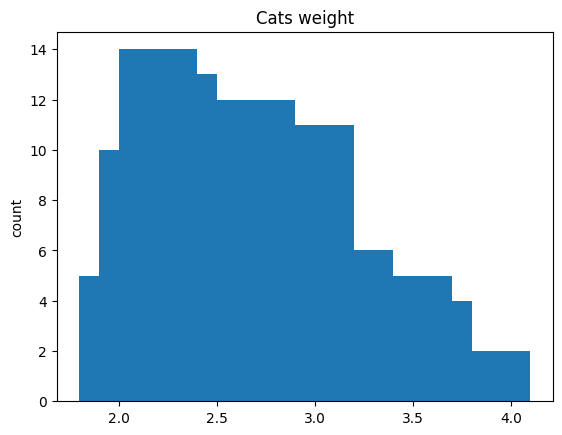

In [8]:
import matplotlib.pyplot as plt
cats_weight_cnt = pd.value_counts(cats.Bwt.values, sort=False)
width = 0.4
plt.bar(cats_weight_cnt.index, cats_weight_cnt.values, width)
plt.title('Cats weight')
plt.ylabel('count')
plt.show()

### 3. 대응표본 t검정 (paired sample t-test)

In [17]:
data = {'before':[7, 3, 4, 5, 2, 1, 6, 6, 5, 4],
         'after':[8, 4, 5, 6, 2, 3, 6, 8, 6, 5]}
df = pd.DataFrame(data)
df.head(3)

,before,after
0,7,8
1,3,4
2,4,5


In [26]:
stats.shapiro(df.after - df.before )

ShapiroResult(statistic=0.8148399591445923, pvalue=0.021947985514998436)

In [36]:
# stats.ttest_rel(data['after'], data['before'], alternative='greater')
stat, pval = stats.ttest_rel(data['after'], data['before'], alternative='greater')
print(f'''검정통계량={round(stat, 4)}, P값={round(pval, 4)}
P값(0.0005)이 유의수준 0.05 보다 작기에 귀무가설을 기각한다.
P값이 유의수준 보다 작으므로 "수면영야제를 복용하기 전과 후의
수면시간 차이는 통계적으로 유의하며, 영양제를 복용 후
수면시간이 늘었다"는 결론을 내릴 수 있다.''')


검정통계량=4.7434, P값=0.0005 
P값(0.0005)이 유의수준 0.05 보다 작기에 귀무가설을 기각한다.
P값이 유의수준 보다 작으므로 "수면영야제를 복용하기 전과 후의
수면시간 차이는 통계적으로 유의하며, 영양제를 복용 후 
수면시간이 늘었다"는 결론을 내릴 수 있다.


$ \gt $